# Exercise 1 b)

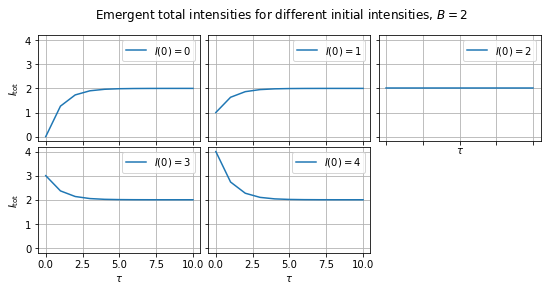

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import ceil

def calculate_intensity(I_0, tau, B=2):
    """Calculates the intensity after the pass through a layer of thickness
    tau, assuming an isothermal sphere"""
    return B + (I_0-B)*np.exp(-tau)


tau_array = np.arange(0, 11, 1)
I_0_array = np.arange(0, 5, 1)
nrows = 2
ncols = ceil(len(I_0_array) / nrows)
fig, axes = plt.subplots(nrows, ncols, figsize=(3*ncols, 2*nrows), sharey=True, sharex=True, gridspec_kw={"wspace": 0.05, "hspace": 0.05})
for i, I_0 in enumerate(I_0_array):
    row = 0 if i < 3 else 1
    col = i if i < 3 else i -3
    ax = axes[row][col]
    ax.plot(tau_array, calculate_intensity(I_0, tau_array), label=r"$I(0)=" + str(I_0) + "$")
    ax.set_xlabel(r"$\tau$")
    if col == 0:
        ax.set_ylabel(r"$I_{\rm tot}$")
    ax.grid(True)
    ax.legend()
for ax in fig.get_axes():
    if len(ax.get_lines()) == 0:
        ax.set_visible(False)
fig.suptitle("Emergent total intensities for different initial intensities, $B=2$")
fig.savefig("../ps02_01_intensities", bbox_inches="tight")

# Exercise 4

In [64]:
import pandas as pd
from astropy.constants import k_B, m_p

def get_pressure(n, temp):
    return  n * temp #*k_B.to_value() 

def get_mean_energy(temp_in_K: float, dof=3) -> float:
    """Return the energy in eV"""
    return dof/2 * k_B.to_value(unit="eV/K") * temp_in_K

df = pd.read_csv("./data/PS02_04_input_table.txt", delim_whitespace=True, header=None, names=["type", "n", "T", "M", "fill_fac", "P"])

df["type"] = df["type"].apply(lambda x: x.capitalize().replace("_", " "))
df["n"] = df["n"].apply(eval)
df["T"] = df["T"].apply(eval)
df["E"] = df["T"].apply(get_mean_energy)
df["P"] = df.apply(lambda x: get_pressure(x["n"], x["T"]), axis=1)
sites = ["Star formation sites", "Sheets and filaments", "Photodissociation regions on the boundaries of HII regions and MCs", "Photo- and collisionally ionised near O and B stars", "Near star formation regions, around SNe"]
df["Sites"] = sites
good_cols = ["type", "Sites",  "n", "T", "P", "E"]
new_names = ["Phase", "Where to find them", r"$n$ [cm$^{-3}$]", "$T$ [K]", r"P [K $k_\tx{B}$cm$^{-3}$]", "$E$ eV"]
print(df[good_cols].to_latex(index=False, header=new_names, escape=False, formatters={"E": lambda s: f"{s:.4f}"}))

\begin{tabular}{llrrrr}
\toprule
       Phase &                                 Where to find them & $n$ [cm$^{-3}$] & $T$ [K] & P [K $k_\tx{B}$cm$^{-3}$] &  $E$ eV \\
\midrule
   Molecular &                               Star formation sites &         300.000 &      10 &                    3000.0 &  0.0013 \\
 Cold atomic &                               Sheets and filaments &          50.000 &      80 &                    4000.0 &  0.0103 \\
 Warm atomic & Photodissociation regions on the boundaries of ... &           0.500 &    8000 &                    4000.0 &  1.0341 \\
Warm ionised & Photo- and collisionally ionised near O and B s... &           0.300 &    8000 &                    2400.0 &  1.0341 \\
 Hot ionised &            Near star formation regions, around SNe &           0.003 &  500000 &                    1500.0 & 64.6300 \\
\bottomrule
\end{tabular}



In [68]:
def get_sound_speed(mu, temp, dof=3):
    num = (1+2/dof)*k_B.to_value() * temp
    denom = mu*m_p.to_value(unit="kg")
    frac = num/denom
    return np.sqrt(frac)/1000
df["mu"] = df["type"].apply(lambda x: 1/2 if "ionised" in x else 1)
df["cs"] = df.apply(lambda x: get_sound_speed(x["mu"], x["T"]), axis=1)
good_cols = ["type",  "T", "mu", "cs"]
new_names = ["Phase", "$T$ [K]", "$\mu$", "$c_s$ [km/s]"]
print(df[good_cols].to_latex(index=False, header=new_names, escape=False, formatters={"cs": lambda s: f"{s:.4f}"}))

\begin{tabular}{lrrr}
\toprule
       Phase & $T$ [K] & $\mu$ & $c_s$ [km/s] \\
\midrule
   Molecular &      10 &   1.0 &       0.3709 \\
 Cold atomic &      80 &   1.0 &       1.0491 \\
 Warm atomic &    8000 &   1.0 &      10.4909 \\
Warm ionised &    8000 &   0.5 &      14.8364 \\
 Hot ionised &  500000 &   0.5 &     117.2917 \\
\bottomrule
\end{tabular}

